# Import required libraries

In [1]:
!pip install textblob
!pip install wordcloud
!pip install gensim

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.classify import SklearnClassifier
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
nltk.download('wordnet')

# Other
import re
import string
import numpy as np
np.random.seed(2018)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from textblob import TextBlob
from collections import Counter
from time import time
from subprocess import check_output

# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from sklearn.manifold import TSNE

#from wordcloud for worldcloud
from wordcloud import WordCloud,STOPWORDS

#import gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\dell\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial




# **Read nike csv data**

In [3]:
!pip install xlrd

# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
    
nike_csv = pd.read_excel("C:/Users/dell/Desktop/Nike_sentiment_analysis-master/dataset12.xlsx")
nike_csv.head()

,Review
0,PRICED ABOVE MSRP. First thing first. These ar...
1,"Fantastic product, the high quality stuff you ..."
2,"Nice, comfortable shirt. I wear it playing ten..."
3,Im such a big fan of this running and workout ...
4,The Nike Mens Legend shirt fit great for my so...


# **Make new coloumn for score of the sentiment**

In [4]:
nike_csv['score'] = ''

# **New structure of dataframe**

In [5]:
print(nike_csv.head())

                                              Review score
0  PRICED ABOVE MSRP. First thing first. These ar...      
1  Fantastic product, the high quality stuff you ...      
2  Nice, comfortable shirt. I wear it playing ten...      
3  Im such a big fan of this running and workout ...      
4  The Nike Mens Legend shirt fit great for my so...      


# **Looking into first review**

In [6]:
print(nike_csv['Review'][0])

PRICED ABOVE MSRP. First thing first. These are Overpriced. This particular Nike Dri-Fit Training shirt has an MSRP of $22 (see picture of the tag from the green shirt for $22 and I paid $24 for it) and most of them listed here are going for $22-$30. That is ridiculous. You can go to Dicks Sporting Goods website and get them for $16.50. I ordered two of these shirts in red and green size XL for $23 and $24 respectively. The only reason I ordered these is because I thought they were the Dri-Fit Ts that normally retail for ~$35 and I thought I was getting a good deal. I have two of the $35 dri-fit t-shirts already, which fit really nice (not tight, I hate tight shirts, but not loose). These cheaper dri-fit t-shirts fit much larger than the $35 ones (see picture red $22 MSRP from amazon on left and navy $35 MSRP from Dicks on right, both XL). I am 63", 230 lbs and the XL feels like I am wearing a dress.

I will be returning these shirts. I paid too much for what they actually are, and on 

# **Scoring reviews for training of ML Model**

In [7]:
for i in range(len(nike_csv['Review'])):
    testimonial = TextBlob(nike_csv['Review'][i])
    testimonial.sentiment
    nike_csv['score'][i]=testimonial.sentiment.polarity

# **a look at modified dataframe with scores**

In [8]:
nike_csv.head()

,Review,score
0,PRICED ABOVE MSRP. First thing first. These ar...,0.131667
1,"Fantastic product, the high quality stuff you ...",0.208524
2,"Nice, comfortable shirt. I wear it playing ten...",0.0197619
3,Im such a big fan of this running and workout ...,-0.05
4,The Nike Mens Legend shirt fit great for my so...,0.45


# **Converting scores to 0 and 1 for positive and negative sentiments**

In [9]:
for i in range(len(nike_csv['score'])):
    if nike_csv['score'][i]>  0:
        nike_csv['score'][i] = 1
    else:
        nike_csv['score'][i] = 0

# **a look at scored modified dataframe**



In [10]:
nike_csv.head(10)

,Review,score
0,PRICED ABOVE MSRP. First thing first. These ar...,1
1,"Fantastic product, the high quality stuff you ...",1
2,"Nice, comfortable shirt. I wear it playing ten...",1
3,Im such a big fan of this running and workout ...,0
4,The Nike Mens Legend shirt fit great for my so...,1
5,Nice fit and wears as advertised. Dri material...,1
6,Awesome and comfortable shirt! I wear when wor...,1
7,This particular shirt came quite a bit larger ...,1
8,Not yellow\nIt is a puke color and it was wadd...,1
9,"Definitely great and authentic Nike quality, b...",1


# **Function for cleaning the review**

In [11]:
nltk.download('stopwords')
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **reviews cleaned and modified text written in dataframe**

In [12]:
nike_csv['Review'] = nike_csv['Review'].map(lambda x: clean_text(x))

# **a look at modified dataframe**

In [13]:
nike_csv.head()

,Review,score
0,price msrp first thing first overpr particular...,1
1,fantast product high qualiti stuff expect nike...,1
2,nice comfort shirt wear play tenni jog boat ru...,1
3,big fan run workout shirt wick moistur well ac...,0
4,nike men legend shirt fit great son use summer...,1


# **Barplot of occurances of each positive and negative review, a look at data.**

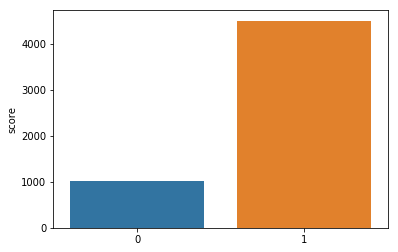

In [14]:
sns.barplot(x=['1', '0'], y=nike_csv['score'].value_counts())
plt.show()

# **Wordcount plot of positive reviews**

Positive words


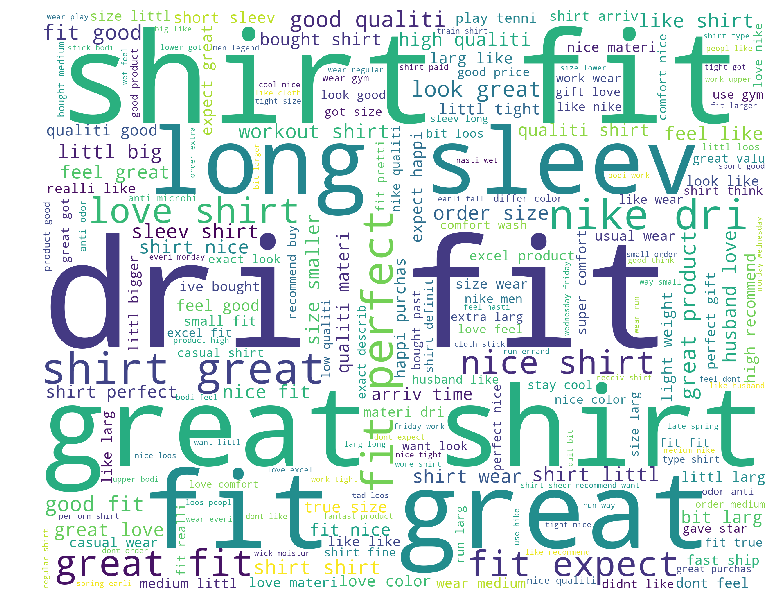

In [15]:

train_pos = nike_csv[ nike_csv['score'] == 1]
train_pos = nike_csv['Review']
train_neg = nike_csv[ nike_csv['score'] == 0]
train_neg = nike_csv['Review']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
# print("Negative words")
# wordcloud_draw(train_neg)

# **Training of the model for Sentimental Analysis**

In [16]:
train, test = train_test_split(nike_csv,test_size = 0.1)

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Review.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.score))

test_pos = test[ test['score'] == 1]
test_pos = test_pos['Review']
test_neg = test[ test['score'] == 0]
test_neg = test_neg['Review']

In [17]:
#  Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

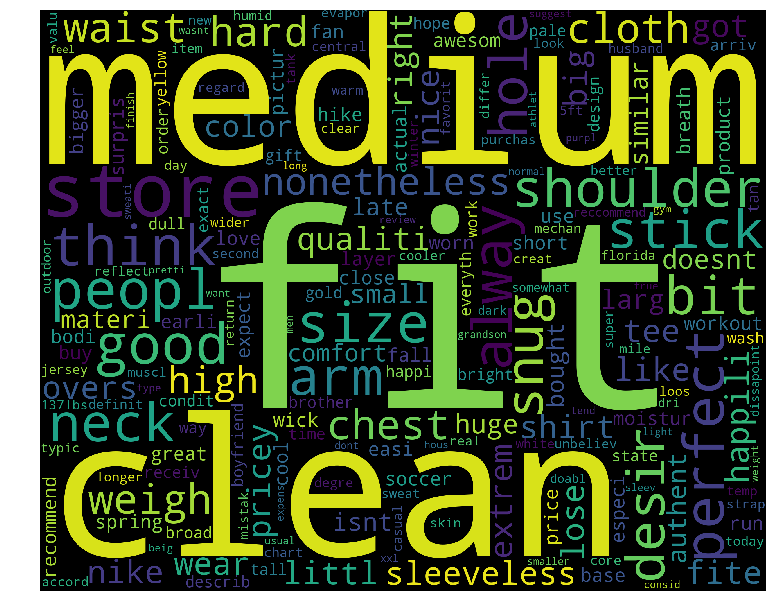

In [18]:
wordcloud_draw(w_features)

## **Training the Naive Bayes classifier**

In [19]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [20]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt)) 

[Negative]: 92/78 
[Positive]: 460/458 


# **Neural Network Model using TF**

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import seaborn as sns

In [90]:
!pip install xlrd
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
  
nike_csv = pd.read_excel(fn)
nike_csv.head()
nike_csv['polarity'] = ''

print(nike_csv.head())
for i in range(len(nike_csv['Review'])):
    testimonial = TextBlob(nike_csv['Review'][i])
    testimonial.sentiment
    nike_csv['polarity'][i]=testimonial.sentiment.polarity
for i in range(len(nike_csv['polarity'])):
    if nike_csv['polarity'][i]>  0:
        nike_csv['polarity'][i] = 1
    else:
        nike_csv['polarity'][i] = 0


        
  
train_df = nike_csv
test_df = nike_csv

Saving data12.xlsx to data12 (3).xlsx
User uploaded file "data12.xlsx" with length 61003 bytes
                                              Review polarity
0  PRICED ABOVE MSRP. First thing first. These ar...         
1  Fantastic product, the high quality stuff you ...         
2  Nice, comfortable shirt. I wear it playing ten...         
3  Im such a big fan of this running and workout ...         
4  The Nike Mens Legend shirt fit great for my so...         


In [91]:
train_df.head()

,Review,polarity
0,PRICED ABOVE MSRP. First thing first. These ar...,1
1,"Fantastic product, the high quality stuff you ...",1
2,"Nice, comfortable shirt. I wear it playing ten...",1
3,Im such a big fan of this running and workout ...,0
4,The Nike Mens Legend shirt fit great for my so...,1


In [0]:
sentences = nike_csv['Review'].values
y = nike_csv['polarity'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train
X_test

<1379x1321 sparse matrix of type '<class 'numpy.int64'>'
	with 19573 stored elements in Compressed Sparse Row format>

In [94]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

# **Attribute Analysis from dataset**

In [21]:
data_text = nike_csv[['Review']]
documents = data_text

In [22]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [23]:
processed_docs = documents['Review'].map(preprocess)

In [24]:
processed_docs[:10]

0    [price, msrp, thing, overpr, particular, nike,...
1    [fantast, product, high, qualiti, stuff, expec...
2    [nice, comfort, shirt, wear, play, tenni, boat...
3    [workout, shirt, wick, moistur, actual, hike, ...
4    [nike, legend, shirt, great, summer, camp, pur...
5    [nice, wear, adverti, materi, retain, slight, ...
6    [awesom, comfort, shirt, wear, work, play, ten...
7    [particular, shirt, come, quit, larger, medium...
8    [yellow, puke, color, packag, think, origin, n...
9    [definit, great, authent, nike, qualiti, larg,...
Name: Review, dtype: object

In [25]:
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 actual
1 alreadi
2 amazon
3 besid
4 cheaper
5 deal
6 dick
7 dont
8 dress
9 favor
10 feel


# **Bag of words on the dataset**

In [26]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [27]:

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(79, 1)]

In [28]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 79 ("great") appears 1 time.


# **TF-IDF**

In [29]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [30]:
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.12105554775965255),
 (1, 0.1366928729581678),
 (2, 0.15577358644816755),
 (3, 0.13047573464934129),
 (4, 0.1366928729581678),
 (5, 0.09589470396208999),
 (6, 0.15577358644816755),
 (7, 0.08294961120522491),
 (8, 0.11266714733226775),
 (9, 0.3115471728963351),
 (10, 0.1446616070241884),
 (11, 0.06969535630459663),
 (12, 0.2421110955193051),
 (13, 0.15577358644816755),
 (14, 0.06225960386222903),
 (15, 0.08092467684776561),
 (16, 0.08617907732556711),
 (17, 0.06329179696555016),
 (18, 0.06778586872674926),
 (19, 0.12105554775965255),
 (20, 0.3161377319837234),
 (21, 0.15577358644816755),
 (22, 0.1446616070241884),
 (23, 0.2733857459163356),
 (24, 0.22798402725674158),
 (25, 0.09144794595076727),
 (26, 0.13047573464934129),
 (27, 0.07104354062384785),
 (28, 0.09775957600926093),
 (29, 0.1366928729581678),
 (30, 0.15577358644816755),
 (31, 0.11730496575459462),
 (32, 0.11102515176999116),
 (33, 0.25381379719214847),
 (34, 0.12872576617653847),
 (35, 0.12105554775965255),
 (36, 0.144

# **Running LDA using Bag of Words**

In [31]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.088*"size" + 0.081*"larg" + 0.035*"shirt" + 0.029*"medium" + 0.027*"wear" + 0.026*"order" + 0.025*"great" + 0.024*"look" + 0.024*"smaller" + 0.023*"like"
Topic: 1 
Words: 0.116*"great" + 0.085*"love" + 0.043*"look" + 0.038*"product" + 0.028*"exact" + 0.027*"shirt" + 0.025*"arriv" + 0.025*"perfect" + 0.023*"expect" + 0.021*"like"
Topic: 2 
Words: 0.061*"shirt" + 0.046*"nike" + 0.029*"buy" + 0.029*"great" + 0.027*"long" + 0.026*"color" + 0.023*"expect" + 0.023*"good" + 0.022*"size" + 0.020*"sleev"
Topic: 3 
Words: 0.095*"shirt" + 0.056*"order" + 0.045*"color" + 0.043*"like" + 0.033*"size" + 0.030*"love" + 0.025*"feel" + 0.023*"loo" + 0.022*"wear" + 0.020*"materi"
Topic: 4 
Words: 0.159*"great" + 0.079*"good" + 0.075*"shirt" + 0.057*"nice" + 0.050*"materi" + 0.026*"like" + 0.026*"price" + 0.026*"qualiti" + 0.022*"comfort" + 0.021*"wear"
Topic: 5 
Words: 0.142*"shirt" + 0.031*"wear" + 0.028*"love" + 0.024*"great" + 0.021*"buy" + 0.020*"light" + 0.015*"nike" + 0.015*"long

# **Running LDA using TF-IDF**

In [32]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


Topic: 0 Word: 0.056*"comfort" + 0.049*"long" + 0.041*"sleev" + 0.033*"color" + 0.031*"shirt" + 0.025*"great" + 0.019*"buy" + 0.019*"price" + 0.018*"super" + 0.015*"order"
Topic: 1 Word: 0.030*"feel" + 0.029*"tight" + 0.028*"good" + 0.026*"perfect" + 0.025*"wear" + 0.024*"size" + 0.023*"like" + 0.018*"shirt" + 0.017*"materi" + 0.017*"happi"
Topic: 2 Word: 0.045*"expect" + 0.031*"larg" + 0.031*"awesom" + 0.030*"shirt" + 0.024*"true" + 0.023*"materi" + 0.022*"nice" + 0.020*"wear" + 0.019*"size" + 0.017*"like"
Topic: 3 Word: 0.045*"work" + 0.027*"comfort" + 0.023*"shirt" + 0.020*"good" + 0.017*"arriv" + 0.016*"great" + 0.016*"price" + 0.015*"exact" + 0.014*"sleev" + 0.014*"wear"
Topic: 4 Word: 0.124*"good" + 0.058*"great" + 0.037*"shirt" + 0.036*"love" + 0.020*"right" + 0.020*"expect" + 0.018*"wear" + 0.016*"product" + 0.015*"want" + 0.014*"look"
Topic: 5 Word: 0.143*"love" + 0.028*"order" + 0.028*"size" + 0.024*"shirt" + 0.023*"feel" + 0.020*"gift" + 0.019*"like" + 0.019*"husband" + 0.01

# **Classification of the topics**

# **Performance evaluation by classifying sample document using LDA Bag of Words model**

In [33]:
processed_docs[4310]

['great']

In [34]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5499588847160339	 
Topic: 0.159*"great" + 0.079*"good" + 0.075*"shirt" + 0.057*"nice" + 0.050*"materi" + 0.026*"like" + 0.026*"price" + 0.026*"qualiti" + 0.022*"comfort" + 0.021*"wear"

Score: 0.0500192753970623	 
Topic: 0.116*"great" + 0.085*"love" + 0.043*"look" + 0.038*"product" + 0.028*"exact" + 0.027*"shirt" + 0.025*"arriv" + 0.025*"perfect" + 0.023*"expect" + 0.021*"like"

Score: 0.05000562593340874	 
Topic: 0.062*"wear" + 0.062*"comfort" + 0.050*"shirt" + 0.045*"love" + 0.041*"buy" + 0.040*"great" + 0.035*"expect" + 0.033*"work" + 0.031*"gift" + 0.024*"excel"

Score: 0.050004083663225174	 
Topic: 0.061*"shirt" + 0.046*"nike" + 0.029*"buy" + 0.029*"great" + 0.027*"long" + 0.026*"color" + 0.023*"expect" + 0.023*"good" + 0.022*"size" + 0.020*"sleev"

Score: 0.050003498792648315	 
Topic: 0.088*"size" + 0.081*"larg" + 0.035*"shirt" + 0.029*"medium" + 0.027*"wear" + 0.026*"order" + 0.025*"great" + 0.024*"look" + 0.024*"smaller" + 0.023*"like"

Score: 0.050003476440906525	 
T

# **Performance evaluation by classifying sample document using LDA Bag of Words model**

In [35]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.54997718334198	 
Topic: 0.223*"great" + 0.093*"shirt" + 0.068*"nice" + 0.026*"look" + 0.022*"love" + 0.014*"exerci" + 0.014*"casual" + 0.013*"materi" + 0.012*"color" + 0.012*"travel"

Score: 0.05000593140721321	 
Topic: 0.124*"good" + 0.058*"great" + 0.037*"shirt" + 0.036*"love" + 0.020*"right" + 0.020*"expect" + 0.018*"wear" + 0.016*"product" + 0.015*"want" + 0.014*"look"

Score: 0.050003357231616974	 
Topic: 0.061*"qualiti" + 0.045*"comfort" + 0.033*"great" + 0.023*"shirt" + 0.022*"littl" + 0.019*"nice" + 0.018*"materi" + 0.017*"love" + 0.017*"product" + 0.017*"high"

Score: 0.05000279098749161	 
Topic: 0.112*"perfect" + 0.060*"excel" + 0.044*"gift" + 0.028*"great" + 0.027*"price" + 0.024*"product" + 0.023*"nice" + 0.019*"qualiti" + 0.016*"good" + 0.015*"need"

Score: 0.050002507865428925	 
Topic: 0.056*"comfort" + 0.049*"long" + 0.041*"sleev" + 0.033*"color" + 0.031*"shirt" + 0.025*"great" + 0.019*"buy" + 0.019*"price" + 0.018*"super" + 0.015*"order"

Score: 0.050002254545

# **Testing model on unseen document**

In [36]:
unseen_document = 'This is very good piece of cloth'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6999598145484924	 Topic: 0.044*"product" + 0.042*"shirt" + 0.041*"qualiti" + 0.033*"good" + 0.032*"nike"
Score: 0.03334837779402733	 Topic: 0.159*"great" + 0.079*"good" + 0.075*"shirt" + 0.057*"nice" + 0.050*"materi"
Score: 0.033339787274599075	 Topic: 0.109*"shirt" + 0.034*"good" + 0.027*"perfect" + 0.023*"sleev" + 0.022*"order"
Score: 0.03333771228790283	 Topic: 0.061*"shirt" + 0.046*"nike" + 0.029*"buy" + 0.029*"great" + 0.027*"long"
Score: 0.033337660133838654	 Topic: 0.080*"shirt" + 0.047*"littl" + 0.046*"comfort" + 0.044*"perfect" + 0.031*"workout"
Score: 0.0333365835249424	 Topic: 0.095*"shirt" + 0.056*"order" + 0.045*"color" + 0.043*"like" + 0.033*"size"
Score: 0.033335667103528976	 Topic: 0.116*"great" + 0.085*"love" + 0.043*"look" + 0.038*"product" + 0.028*"exact"
Score: 0.033334989100694656	 Topic: 0.062*"wear" + 0.062*"comfort" + 0.050*"shirt" + 0.045*"love" + 0.041*"buy"
Score: 0.03333476558327675	 Topic: 0.142*"shirt" + 0.031*"wear" + 0.028*"love" + 0.024*"great"

In [37]:
import spacy
!python -m spacy download en

!python -m spacy download en_core_web_md
!python -m spacy link en_core_web_md en 
from spacy.lang.en import English
import en_core_web_sm
nlp = en_core_web_sm.load()

parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


    Error: Couldn't link model to 'en'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    C:\Users\dell\Anaconda3\lib\site-packages\en_core_web_sm -->
    C:\Users\dell\Anaconda3\lib\site-packages\spacy\data\en


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
    package name: nlp = spacy.load('{name}')
    Download successful but linking failed

  Running setup.py install for en-core-web-md: started
    Running setup.py install for en-core-web-md: finished with status 'done'

    Error: Couldn't link model to 'en_core_web_md'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    vir

Traceback (most recent call last):
  File "C:\Users\dell\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\dell\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\dell\Anaconda3\lib\site-packages\spacy\__main__.py", line 31, in <module>
    plac.call(commands[command], sys.argv[1:])
  File "C:\Users\dell\Anaconda3\lib\site-packages\plac_core.py", line 328, in call
    cmd, result = parser.consume(arglist)
  File "C:\Users\dell\Anaconda3\lib\site-packages\plac_core.py", line 207, in consume
    return cmd, self.func(*(args + varargs + extraopts), **kwargs)
  File "C:\Users\dell\Anaconda3\lib\site-packages\spacy\cli\link.py", line 48, in link
    symlink_to(link_path, model_path)
  File "C:\Users\dell\Anaconda3\lib\site-packages\spacy\compat.py", line 87, in symlink_to
    orig.symlink_to(dest)
  File "C:\Users\dell\Anaconda3\lib\pathlib.py", line 1325, in symlink_to
    self._accessor.symlink(tar

# **Lemmatization**

In [42]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Stopwords for frequent occuring words**

In [43]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Text pre-processing for LDA**

In [44]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

# **Import CSV from Google colab**

In [45]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
import random
text_data = []
with open('C:/Users/dell/Desktop/Nike_sentiment_analysis-master/dataset.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['running', 'workout', 'shirt', 'wick', 'moisture', 'actually', 'hiking', 'especially', 'layer', 'spring', 'early']
[]
['order', 'extra', 'large', 'others', 'seem', 'small', 'order']
[]
['perfect', 'thanks']
['awesome', 'shirt', 'expect']
['husband', 'like', 'shirt']
['buy', 'husband', 'love', 'want', 'color', 'somewhat', 'disappoint', 'larger', 'sleeve', 'buy', 'future', 'buyer', 'recommend', 'buying', 'smaller']
[]
['sleeve', 'tight']
['nothing', 'years', 'legend', 'better', 'like', 'material', 'better']
['comfortably']
['somewhat', 'dissapointed', 'color', 'shirt']
['solid', 'quality', 'price']
['really', 'small', 'material', 'would', 'right']
['receive', 'shirt', 'order', 'order', 'another', 'color', 'perfect']
['christmas', 'love', 'several', 'times']
['three', 'different', 'colors', 'order', 'place', 'shipping', 'different', 'colors']
['great', 'shirt', 'basketball', 'game', 'color']
[]
['really', 'shirt', 'definitely', 'large', 'sleeve', 'opening', 'larger', 'would', 'really', '

In [46]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

In [47]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [48]:

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [49]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [50]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.055*"great" + 0.042*"order" + 0.042*"quality" + 0.042*"material"')
(1, '0.062*"shirt" + 0.042*"comfortable" + 0.042*"love" + 0.032*"order"')
(2, '0.114*"shirt" + 0.050*"color" + 0.034*"perfect" + 0.026*"material"')
(3, '0.061*"shirt" + 0.041*"expect" + 0.041*"sleeve" + 0.031*"like"')
(4, '0.035*"tight" + 0.035*"order" + 0.035*"little" + 0.035*"around"')


In [51]:
new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))


[]
[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]


In [52]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.050*"order" + 0.026*"quality" + 0.026*"product" + 0.026*"different"')
(1, '0.126*"shirt" + 0.025*"color" + 0.025*"comfortable" + 0.025*"order"')
(2, '0.059*"great" + 0.035*"color" + 0.026*"love" + 0.025*"material"')


In [53]:

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.006*"shirt" + 0.006*"great" + 0.006*"comfortable" + 0.006*"quality"')
(1, '0.047*"shirt" + 0.047*"really" + 0.047*"order" + 0.047*"small"')
(2, '0.117*"shirt" + 0.045*"expect" + 0.045*"perfect" + 0.045*"like"')
(3, '0.103*"shirt" + 0.062*"large" + 0.042*"chart" + 0.042*"return"')
(4, '0.079*"shirt" + 0.041*"great" + 0.041*"love" + 0.021*"workout"')
(5, '0.089*"shirt" + 0.074*"colors" + 0.045*"order" + 0.045*"comfortable"')
(6, '0.098*"color" + 0.098*"great" + 0.035*"product" + 0.035*"always"')
(7, '0.137*"sleeve" + 0.048*"inch" + 0.048*"165lbs" + 0.048*"hands"')
(8, '0.060*"buy" + 0.041*"order" + 0.041*"color" + 0.041*"tight"')
(9, '0.103*"quality" + 0.078*"order" + 0.053*"great" + 0.053*"price"')


In [54]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

# **Importing pyLDAvis for LDA Visualisation**

In [55]:
!pip install pyLDAvis
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

  Running setup.py bdist_wheel for pyLDAvis: started
  Running setup.py bdist_wheel for pyLDAvis: finished with status 'done'
  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\dell\AppData\Local\pip\Cache\wheels\0c\61\d2\d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built pyLDAvis future


C:\Users\dell\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




# **pyLDAvis for model3**

In [56]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

C:\Users\dell\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




# **pyLDAvis  for model10 **

In [57]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

C:\Users\dell\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




# Rake Algorithm for key phare extraction

In [59]:
!pip install rake_nltk

from rake_nltk import Rake

r = Rake()

In [67]:
nike_csv = pd.read_excel("C:/Users/dell/Desktop/Nike_sentiment_analysis-master/dataset12.xlsx")
nike_csv.head()

,Review
0,PRICED ABOVE MSRP. First thing first. These ar...
1,"Fantastic product, the high quality stuff you ..."
2,"Nice, comfortable shirt. I wear it playing ten..."
3,Im such a big fan of this running and workout ...
4,The Nike Mens Legend shirt fit great for my so...


In [68]:
nike_csv['attribute']=''
nike_csv.head()

,Review,attribute
0,PRICED ABOVE MSRP. First thing first. These ar...,
1,"Fantastic product, the high quality stuff you ...",
2,"Nice, comfortable shirt. I wear it playing ten...",
3,Im such a big fan of this running and workout ...,
4,The Nike Mens Legend shirt fit great for my so...,


In [73]:
for i in range(len(nike_csv['Review'])):
    text = nike_csv['Review'][i]
    r.extract_keywords_from_text(text)
    nike_csv['attribute'][i] = r.get_ranked_phrases()
#     print(r.get_ranked_phrases_with_scores())

# Look at attributes assigned

In [78]:
nike_csv.head()

,Review,attribute
0,PRICED ABOVE MSRP. First thing first. These ar...,"[63 "", 230 lbs, dicks sporting goods website, ..."
1,"Fantastic product, the high quality stuff you ...","[high quality stuff, warmer climates, tad loos..."
2,"Nice, comfortable shirt. I wear it playing ten...","[wide range, several colors, running errands, ..."
3,Im such a big fan of this running and workout ...,"[workout shirt, wicks moisture, early fall, bo..."
4,The Nike Mens Legend shirt fit great for my so...,"[nike mens legend shirt fit great, great job w..."
